![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando derivadas de ordem superior

A primeira ideia para calcular a derivada segunda de uma função é calcular duas vezes a derivada.
Inclusive porque esta é a definição!

Assim, $f''(x) \sim [f'(x+h) - f'(x-h)]/2h$, e o cálculo de $f'(x\pm h)$ pode ser feito analogamente.

Implemente esta fórmula.

In [2]:
def ddf(f, x, h=1e-5):
    """Calcula uma aproximação da segunda derivada de $f$, nos pontos do vetor x, usando passos de tamanho $h$."""
    def df(f,x,H):
        return (f(x+H) - f(x-H))/(2*H)
    return (df(f,x+h,h) - df(f,x-h,h))/(2*h)

Testando uma função fácil.

In [3]:
# Perto
assert np.abs(ddf(np.sin, 1, 0.01) - (-np.sin(1))) < 1e-4

In [4]:
# Mas não perto demais
assert np.abs(ddf(np.sin, 1, 0.01) - (-np.sin(1))) > 1e-6

In [5]:
# Bem mais perto de algo um pouco errado
assert np.isclose(ddf(np.sin, 1, 0.01), -0.841442936, atol=1e-7)

Testando que, ao diminuir o passo, de fato o erro diminui.

In [6]:
assert np.abs(ddf(np.sin, 1, 0.001) - (-np.sin(1))) < 1e-6

In [7]:
assert np.abs(ddf(np.sin, 1, 0.001) - (-np.sin(1))) > 1e-8

In [8]:
assert np.isclose(ddf(np.sin, 1, 0.001), -0.8414704338, atol=1e-9)

### Derivadas laterais

Poderíamos ter calculado duas vezes as derivadas laterais.
Implemente esta solução também.

In [9]:
def ddf_lateral(f, x, h=1e-5):
    """Calcula uma aproximação da segunda derivada de $f$, nos pontos do vetor x, usando passos de tamanho $h$."""
    def df(f,x,H):
        return (f(x+H) - f(x))/(H)
    return (df(f,x+h,h) - df(f,x,h))/(h)

In [10]:
assert np.abs(ddf_lateral(np.sin, 1, 0.01) + np.sin(1)) < 1e-2
assert np.abs(ddf_lateral(np.sin, 1, 0.01) + np.sin(1)) > 1e-3

In [11]:
assert np.isclose(ddf_lateral(np.sin, 1, 0.01), -0.84682478770914393, atol=1e-5)

Ao diminuir o passo, o erro diminui também

In [12]:
e1 = ddf_lateral(np.sin, 1, 0.01) + np.sin(1)
e2 = ddf_lateral(np.sin, 1, 0.001) + np.sin(1)
assert np.isclose(np.abs(e1/e2), 10, atol=1)

In [13]:
np.random.seed(1)
for x in np.random.randn(100):
    e1 = ddf_lateral(np.sin, x, 0.01) + np.sin(x)
    e2 = ddf_lateral(np.sin, x, 0.0001) + np.sin(x)
    assert np.isclose(np.abs(e1/e2), 100, atol=15), (x, e1, e2, e1/e2)

## Gráficos

Faça um gráfico do erro da segunda derivada, para algum valor do passo,
usando ambos os métodos `ddf` e `ddf_lateral`.
Qual dá o maior erro?

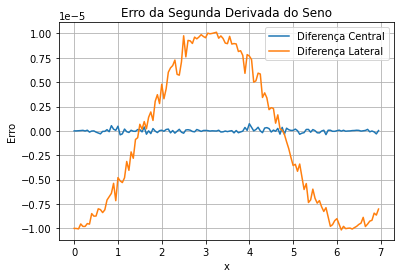

In [14]:
f = np.sin
xs = np.arange(0,7,0.05)
y1 = [ddf(f,xs_i,h = 1e-5)-(-np.sin(xs_i)) for xs_i in xs]
y2 = [ddf_lateral(f,xs_i,h = 1e-5)-(-np.sin(xs_i)) for xs_i in xs]
plt.plot(xs,y1,label="Diferença Central")
plt.plot(xs,y2,label="Diferença Lateral")
plt.title("Erro da Segunda Derivada do Seno")
plt.xlabel("x")
plt.ylabel("Erro")
plt.legend()
plt.grid();

Mude o tamanho do passo, e refaça os gráficos.
**Antes** de aparecer erro numérico, os erros tendem a zero?
Com que velocidade?

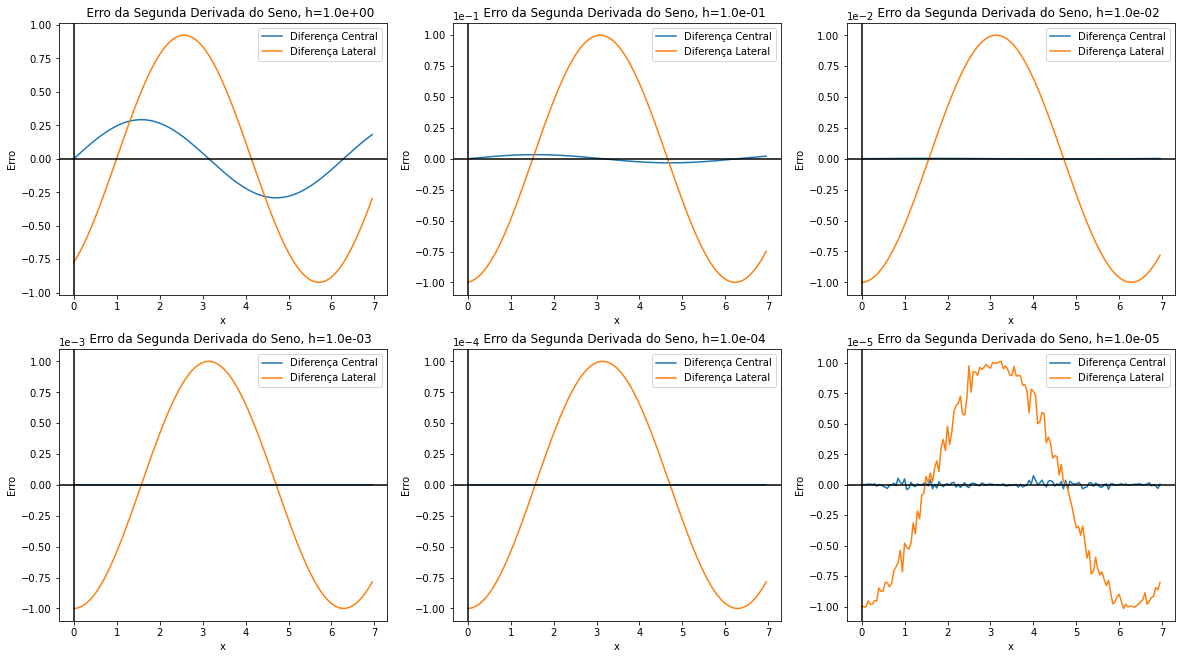

In [15]:
#Celula teste
_,axs = plt.subplots(ncols=3,nrows=2,figsize=(20,11))
f = np.sin
xs = np.arange(0,7,0.05)
hs = np.logspace(0,-5,num=6)
k=0
for i in range(0,2):
    for j in range(0,3):
        y1=ddf(np.sin,xs,h=hs[k])-(-np.sin(xs))
        y2=ddf_lateral(np.sin,xs,h=hs[k])-(-np.sin(xs))
        axs[i,j].plot(xs,y1,label="Diferença Central")
        axs[i,j].plot(xs,y2,label="Diferença Lateral")
        axs[i,j].axhline(color="black")
        axs[i,j].axvline(color="black")
        axs[i,j].set_title(f"    Erro da Segunda Derivada do Seno, h={hs[k]:.1e}")
        axs[i,j].set_xlabel("x")
        axs[i,j].set_ylabel("Erro")
        axs[i,j].legend()
        axs[i,j].ticklabel_format(axis="y",scilimits=(0,0))
        k+=1

Comente abaixo a velocidade de decaimento do erro.

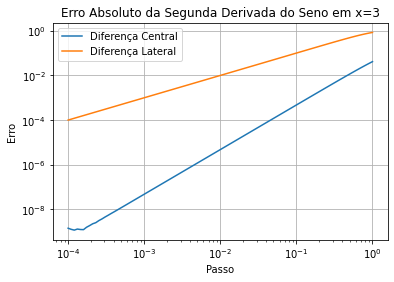

In [16]:
f = np.sin
hs = np.logspace(-4,0,num=100)
y1 = [abs(ddf(f,3,h) - (-np.sin(3))) for h in hs]
y2 = [abs(ddf_lateral(f,3,h) - (-np.sin(3))) for h in hs]

plt.loglog(hs,y1,label="Diferença Central")
plt.loglog(hs,y2,label="Diferença Lateral")


plt.legend()
plt.grid()
plt.title("Erro Absoluto da Segunda Derivada do Seno em x=3")
plt.xlabel("Passo")
plt.ylabel("Erro");

Podemos ver que sim, antes de aparecer os erros numéricos os erros da aproximação da segunda derivada ficam menores cada vez que diminuimos o passo, tendendo sim a $0$, tendência essa que fica mais explícita no grafico dos erros da implementação das diferenças finitas pelo passo usado. Nesse gráfico é possivel ver a relação proporcional entre os dois termos além de podermos comparar as velocidades de como esse erro tende a $0$ para os dois métodos. Para a diferença central, a cada ordem de grandeza diminuida no passo o erro diminui em duas ordens de grandeza,pode-se dizer então que o erro da diferença central tem $O(h^{2})$. Mas para a diferença lateral, a cada duas ordem de grandeza diminuida no passo o erro diminui em duas ordens de grandeza, pode-se dizer então que o erro da diferença lateral tem $O(h)$, o que concorda com o experado para o erro da expanção de Taylor para essas fórmulas.


## Limites de passo

Já sabemos que não podemos fazer $h \to 0$.
O objetivo desta parte é encontrar um $h$ "quase ótimo" para cada um dos métodos.

In [17]:
### Interactive solution
from ipywidgets import IntSlider, interactive

Escreva uma função `do(logh1, logh2)` que faz dois gráficos de erro do seno, no intervalo $[0,7]$,
para passos $h_1 = 2^{- \tt logh1}$ para a derivada simétrica `ddf`,
e respectivamente para $h_2 = 2^{- \tt logh2}$ para a derivada lateral `ddf_lateral`.

Dica: use `fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(17,4))`
para gerar a figura e os dois eixos separados, e não esqueça dos títulos!

In [18]:
xs = np.arange(0,7,0.05)
def do(logh1, logh2):
    fig, [ax1, ax2] = plt.subplots(ncols=2,figsize=(17,4))
    f = np.sin
    
    #Primeiro Gráfico
    hs1 = 2**(-logh1)
    ax1.plot(xs,ddf(np.sin,xs,h=hs1)-(-np.sin(xs)),label="Diferença Central")
    ax1.axhline(color="black")
    ax1.axvline(color="black")
    ax1.set_title(f"Erro da Segunda Derivada do Seno, h={hs1:.2e}")
    ax1.set_xlabel("x")
    ax1.set_ylabel("Erro")
    ax1.legend()
    ax1.ticklabel_format(axis="y",scilimits=(0,0))
    
    #Segundo Gráfico
    hs2 = 2**(-logh2)
    ax2.plot(xs,ddf_lateral(np.sin,xs,h=hs2)-(-np.sin(xs)),label="Diferença Lateral",color="tab:orange")
    ax2.axhline(color="black")
    ax2.axvline(color="black")
    ax2.set_title(f"Erro da Segunda Derivada do Seno, h={hs2:.2e}")
    ax2.set_xlabel("x")
    ax2.set_ylabel("Erro")
    ax2.legend()
    ax2.ticklabel_format(axis="y",scilimits=(0,0))

In [19]:
logh1s = IntSlider(min=0, value=5, max=30)
logh2s = IntSlider(min=0, value=5, max=30)

interactive(do, logh1=logh1s, logh2=logh2s)

interactive(children=(IntSlider(value=5, description='logh1', max=30), IntSlider(value=5, description='logh2',…

## Generalizando

Como seria a fórmula para a derivada terceira?
Implemente o método simétrico abaixo.

In [20]:
def dddf(f, x, h=1e-5):
    return (ddf(f,x+h,h) - ddf(f,x-h,h))/(2*h)

In [21]:
assert (dddf(np.sin, 1, 0.01) + np.cos(1)) < 1e-4

In [22]:
assert (dddf(np.sin, 1, 0.01) + np.cos(1)) > 1e-5

Fixando $x=1$, e variando $h$, faça um gráfico do erro de cálculo para a derivada terceira do seno.
Qual parece ser o melhor passo para a derivada terceira simétrica?

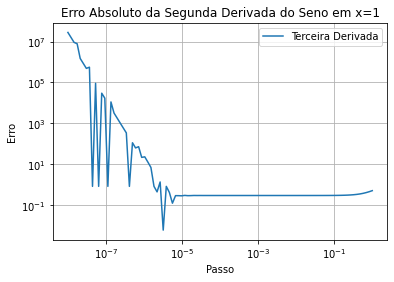

In [23]:
# Seno
f = np.sin
hs = np.logspace(-8,0,num=100)
y = [abs(dddf(f,1,h=hs_i)-(-np.sin(1))) for hs_i in hs]
plt.loglog(hs,y,label="Terceira Derivada")
plt.title("Erro Absoluto da Segunda Derivada do Seno em x=1")
plt.xlabel("Passo")
plt.ylabel("Erro")
plt.legend()
plt.grid();

Faça abaixo um gráfico análogo, para a derivada terceira da exponencial, calculada em $x = 1, 3, 10$.
Use uma única figura e três curvas, portanto não esqueça da legenda.

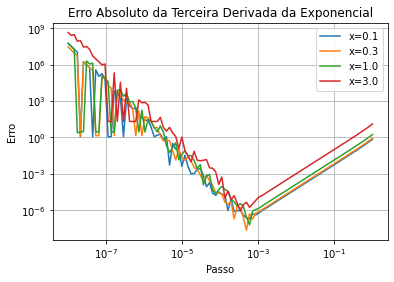

In [24]:
xs = np.array([0.1,0.3,1,3])
f = np.exp
hs = np.logspace(-8,0,num=100)
for xs_i in xs:
    y = [abs(dddf(f,xs_i,h=hs_i)-(np.exp(xs_i))) for hs_i in hs]
    plt.loglog(hs,y,label= f"x={xs_i}")
plt.title("Erro Absoluto da Terceira Derivada da Exponencial")
plt.xlabel("Passo")
plt.ylabel("Erro")
plt.legend()
plt.grid();

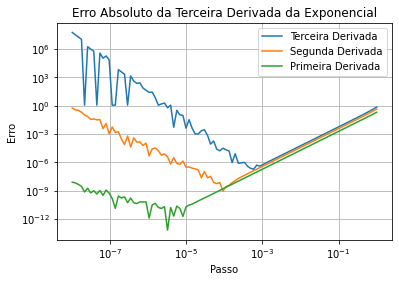

In [25]:
f = np.exp
def df(f,x,H):
    return (f(x+H) - f(x-H))/(2*H)
hs = np.logspace(-8,0,num=100)
y1 = [abs(dddf(f,0.1,h=hs_i)-(np.exp(0.1))) for hs_i in hs]
y2 = [abs(ddf(f,0.1,h=hs_i)-(np.exp(0.1))) for hs_i in hs]
y3 = [abs(df(f,0.1,H=hs_i)-(np.exp(0.1))) for hs_i in hs]
plt.loglog(hs,y1,label= f"Terceira Derivada")
plt.loglog(hs,y2,label= f"Segunda Derivada")
plt.loglog(hs,y3,label= f"Primeira Derivada")
plt.title("Erro Absoluto da Terceira Derivada da Exponencial")
plt.xlabel("Passo")
plt.ylabel("Erro")
plt.legend()
plt.grid();

Comente abaixo os gráficos em especial o ponto de menor erro para a derivada terceira.

Você percebe alguma relação do "melhor $h$" para cada uma das derivadas simétricas que calculamos ($f'$, $f''$ e $f'''$)?

Pode-se observar que para o para os diferentes valores de x, não houve uma signficante variação do "melhor h" já que para a função $e^{x}$ como ela é a sua própria derivada, na expanção da série de taylor o erro numérico é , para um mesmo passo h, diferente relativo a $e^{x}$ então para valores de x pequenos a diferença será pequena e as retas tenderam a ficar próximas.

Para cada uma das derivadas pode-se observar que, com o aumento da ordem das derivadas o erro de truncamento aparece mais "cedo" já que serão usadas as aproximações de derivadas das ordens inferiores e estas carregaram seus erros para acelerar o processo do erro de truncamento. Pode se observar tambem a regularidade entre os intervalos, para cada aumento na ordem da derivada, o "melhor h" sera o melhor h de $f^{'}$ multiplicado por $10$ o que pode ser explicado por implementarmos uma divisão em cada nova ordem superior o que causaria a incerza de um novo dígito.